In [1]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
filtered_cars.shape[0]

392

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def train_and_test(cols):
    lr = LinearRegression()
    lr.fit(filtered_cars[cols], filtered_cars['mpg'])
    predictions = lr.predict(filtered_cars[cols])
    mse = mean_squared_error(filtered_cars['mpg'], predictions)
    variance = np.var(predictions)
    return (mse, variance)

cyl_mse, cyl_var = train_and_test(['cylinders'])
print(str(cyl_mse)+"   "+str(cyl_var))
weight_mse, weight_var = train_and_test(['weight'])
print(str(weight_mse)+"   "+str(weight_var))

24.0201795682   36.7425588742
18.6766165974   42.0861218449


In [5]:
# Our implementation for train_and_test, takes in a list of strings.
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

one_mse, one_var = train_and_test(["cylinders"])
print(str(one_mse)+"   "+str(one_var))

two_mse, two_var = train_and_test(['cylinders','displacement'])
print(str(two_mse)+"   "+str(two_var))

three_mse, three_var = train_and_test(['cylinders','displacement','horsepower'])
print(str(three_mse)+"   "+str(three_var))

four_mse, four_var = train_and_test(['cylinders','displacement','horsepower','weight'])
print(str(four_mse)+"   "+str(four_var))

five_mse, five_var = train_and_test(['cylinders','displacement','horsepower',
                                     'weight','acceleration'])
print(str(five_mse)+"   "+str(five_var))

six_mse, six_var = train_and_test(['cylinders','displacement','horsepower',
                     'weight','acceleration',
                      'model year'])
print(str(six_mse)+"   "+str(six_var))

seven_mse, seven_var = train_and_test(['cylinders','displacement','horsepower',
                     'weight','acceleration',
                      'model year', 'origin'])
print(str(seven_mse)+"   "+str(seven_var))

24.0201795682   36.7425588742
21.2820570556   39.4806813867
20.2529548397   40.5097836026
17.7638605718   42.9988778705
17.7613961054   43.0013423369
11.5901709814   49.1725674609
10.847480945   49.9152574973


In [6]:
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def train_and_cross_val(cols):
    lr = LinearRegression()
    kf = KFold(len(filtered_cars), 10, shuffle=True, random_state=3)
    mses = []
    variances = []
    for train_index, test_index in kf:
        train = filtered_cars.iloc[train_index]
        test = filtered_cars.iloc[test_index]
        lr.fit(train[cols], train['mpg'])
        predictions = lr.predict(test[cols])
        variances.append(np.var(predictions))
        mses.append(mean_squared_error(test['mpg'], predictions))
    return (np.average(mses), np.average(variances))


                    
one_mse, one_var = train_and_cross_val(["cylinders"])
print(str(one_mse)+"   "+str(one_var))

two_mse, two_var = train_and_cross_val(['cylinders','displacement'])
print(str(two_mse)+"   "+str(two_var))

three_mse, three_var = train_and_cross_val(['cylinders','displacement','horsepower'])
print(str(three_mse)+"   "+str(three_var))

four_mse, four_var = train_and_cross_val(['cylinders','displacement','horsepower','weight'])
print(str(four_mse)+"   "+str(four_var))

five_mse, five_var = train_and_cross_val(['cylinders','displacement','horsepower',
                                     'weight','acceleration'])
print(str(five_mse)+"   "+str(five_var))

six_mse, six_var = train_and_cross_val(['cylinders','displacement','horsepower',
                     'weight','acceleration',
                      'model year'])
print(str(six_mse)+"   "+str(six_var))

seven_mse, seven_var = train_and_cross_val(['cylinders','displacement','horsepower',
                     'weight','acceleration',
                      'model year', 'origin'])
print(str(seven_mse)+"   "+str(seven_var))

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


24.2712516049   35.9900710623
21.584370275   38.9025253138
20.6556221939   40.0912879566
18.1696832391   42.5076436436
18.2830385172   42.5987363001
12.0996854255   48.9282469677
11.4181319718   49.904313731


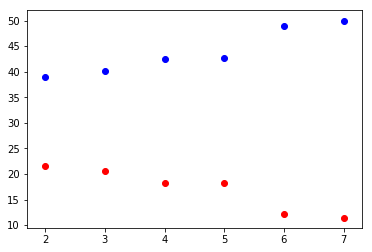

In [7]:
x = list(range(2, 8))
y_mse = [two_mse,three_mse,four_mse,five_mse,six_mse,seven_mse]
y_var = [two_var,three_var,four_var,five_var,six_var,seven_var]
plt.scatter(x, y_mse, c='red')
plt.scatter(x, y_var, c='blue')
plt.show()